In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv', encoding="latin")

In [5]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [35]:
df.isnull().sum().sort_values(ascending=False)

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [7]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# check jumlah data yang mengandung ujaran kebencian
temp = df.groupby('HS').count()['Tweet'].reset_index().sort_values(by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')
temp

,HS,Tweet
0,0,7608
1,1,5561


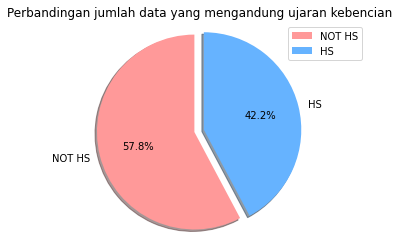

In [30]:
colors=['#ff9999','#66b3ff']
explode = (0, 0.1)

plt.pie(temp['Tweet'],labels=['NOT HS','HS'], colors=colors, startangle=90, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.title("Perbandingan jumlah data yang mengandung ujaran kebencian")
plt.legend()
plt.show()

In [62]:
count_HS_Individual = df['HS_Individual'].value_counts()[1]
count_HS_Group = df['HS_Group'].value_counts()[1]

list_HS_IG = [count_HS_Individual,count_HS_Group]
list_HS_IG

[3575, 1986]

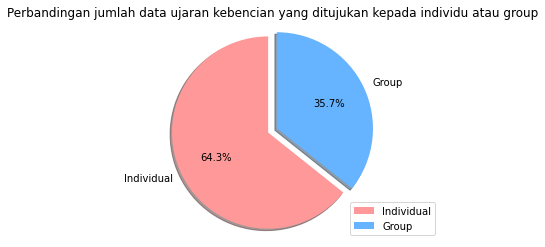

In [70]:
colors=['#ff9999','#66b3ff']
explode = (0, 0.1)

plt.pie(list_HS_IG,labels=['Individual','Group'], colors=colors, startangle=90, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.title("Perbandingan jumlah data ujaran kebencian yang ditujukan kepada individu atau group")
plt.legend()
plt.show()

In [74]:
count_HS_Religion = df['HS_Religion'].value_counts()[1]
count_HS_Race = df['HS_Race'].value_counts()[1]
count_HS_Physical = df['HS_Physical'].value_counts()[1]
count_HS_Gender = df['HS_Gender'].value_counts()[1]
count_HS_Other = df['HS_Other'].value_counts()[1]

list_HS_RRPGO = [count_HS_Religion,count_HS_Race,count_HS_Physical,count_HS_Gender,count_HS_Other]
list_HS_RRPGO

[793, 566, 323, 306, 3740]

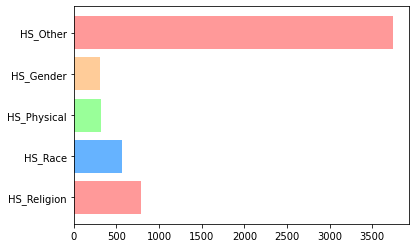

In [75]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
names = ['HS_Religion', 'HS_Race','HS_Physical','HS_Gender','HS_Other']
plt.barh(names,list_HS_RRPGO, color=colors)
plt.show()

In [76]:
count_HS_Weak = df['HS_Weak'].value_counts()[1]
count_HS_Moderate = df['HS_Moderate'].value_counts()[1]
count_HS_Strong = df['HS_Strong'].value_counts()[1]

list_HS_LEVEL = [count_HS_Weak,count_HS_Moderate,count_HS_Strong]
list_HS_LEVEL

[3383, 1705, 473]

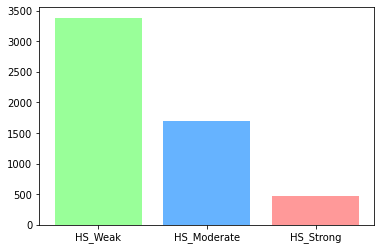

In [79]:
colors = ['#99ff99','#66b3ff','#ff9999','#ffcc99']
names = ['HS_Weak', 'HS_Moderate','HS_Strong']
plt.bar(names,list_HS_LEVEL, color=colors)
plt.show()

In [207]:
def len_char(s): return len(s)
df['jumlah_char_text'] = df['Tweet'].apply(len_char)
df[['Tweet','jumlah_char_text']]
jumlah = df['jumlah_char_text'].sum()
jumlah

1503936

In [80]:
df['jumlah_word_text'] = df['Tweet'].apply(lambda x:len(str(x).split()))

In [208]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,jumlah_word_text,temp_list,jumlah_char_text
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,25,"[-, disaat, semua, cowok, berusaha, melacak, p...",138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,21,"[RT, USER:, USER, siapa, yang, telat, ngasih, ...",120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,37,"[41., Kadang, aku, berfikir,, kenapa, aku, tet...",254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,14,"[USER, USER, AKU, ITU, AKU\n\nKU, TAU, MATAMU,...",75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,14,"[USER, USER, Kaum, cebong, kapir, udah, keliat...",89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,10,"[USER, jangan, asal, ngomong, ndasmu., congor,...",61
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,5,"[USER, Kasur, mana, enak, kunyuk']",28
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,9,"[USER, Hati, hati, bisu, :(, .g\n\nlagi, bosan...",62
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,22,"[USER, USER, USER, USER, Bom, yang, real, muda...",135


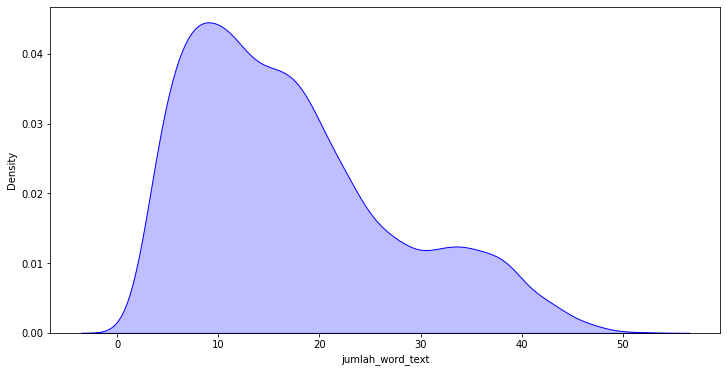

In [157]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['jumlah_word_text'], shade=True, color="b")

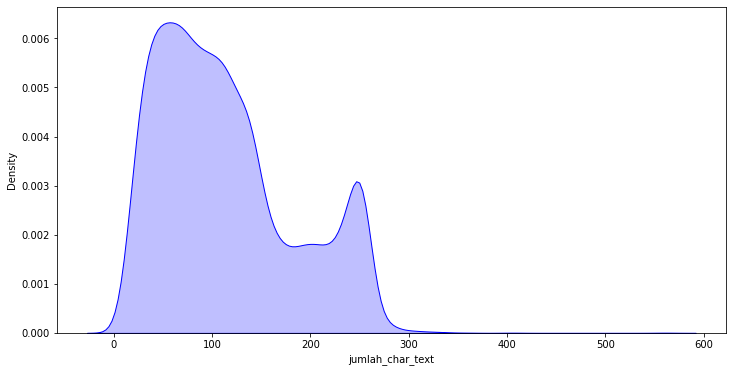

In [209]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['jumlah_char_text'], shade=True, color="b")

In [211]:
df['jumlah_char_text'].describe()

count    13169.000000
mean       114.202749
std         69.075620
min          4.000000
25%         59.000000
50%        100.000000
75%        152.000000
max        561.000000
Name: jumlah_char_text, dtype: float64

In [212]:
df['jumlah_word_text'].describe()

count    13169.000000
mean        17.282102
std         10.231973
min          1.000000
25%          9.000000
50%         15.000000
75%         23.000000
max         52.000000
Name: jumlah_word_text, dtype: float64

In [170]:
temp1 = df['jumlah_word_text'].groupby(df['HS']).sum()
temp1 = temp1.to_list()

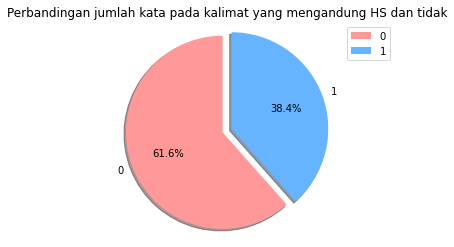

In [171]:
colors=['#ff9999','#66b3ff']
explode = (0, 0.1)

plt.pie(temp1,labels=['0','1'], colors=colors, startangle=90, autopct='%1.1f%%', shadow=True, explode = explode)
plt.axis('equal')
plt.title("Perbandingan jumlah kata pada kalimat yang mengandung HS dan tidak")
plt.legend()
plt.show()

In [172]:
temp1 = df['jumlah_word_text'].groupby(df['HS']).mean()
temp1 = temp1.to_list()

Text(0, 0.5, 'Jumlah kata')

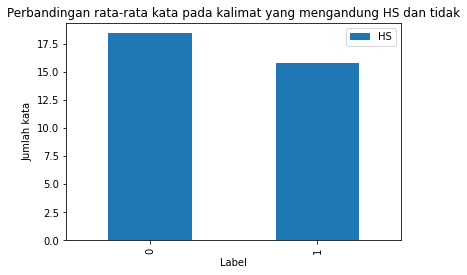

In [173]:
plotdata = pd.DataFrame({
    "HS":temp1
    }, 
    index=["0", "1"]
)
plotdata.plot(kind="bar")
plt.title("Perbandingan rata-rata kata pada kalimat yang mengandung HS dan tidak")
plt.xlabel("Label")
plt.ylabel("Jumlah kata")

In [174]:
from collections import Counter
df['temp_list'] = df['Tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Kata','count']
temp.style.background_gradient(cmap='Blues')

,Kata,count
0,USER,15384
1,yg,2705
2,dan,2519
3,di,2500
4,yang,1786
5,itu,1350
6,;,1225
7,ada,1116
8,ini,1029
9,RT,948


In [165]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Kata", title='Frekuensi Kata', orientation='h', 
             width=700, height=700,color='Kata')
fig.show()

In [182]:
# mengandung HS
Positive_sent = df[df['HS']==1]
# tidak mengandung HS
Negative_sent = df[df['HS']==0]

In [185]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Kata','count']
temp_positive.style.background_gradient(cmap='Greens')

,Kata,count
0,USER,7609
1,yg,1117
2,di,839
3,dan,699
4,RT,567
5,URL,506
6,itu,497
7,ini,420
8,;,378
9,yang,352


In [188]:
fig = px.bar(temp_positive, x="count", y="Kata", title='Kata yang paling sering muncul pada kalimat yang mengandung HS', orientation='h', 
             width=700, height=700,color='Kata')
fig.show()

In [189]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Kata','count']
temp_negative.style.background_gradient(cmap='Reds')

,Kata,count
1,dan,1820
2,di,1661
3,yg,1588
4,yang,1434
5,itu,853
6,;,847
7,ada,796
8,ini,609
9,dari,502
10,dengan,478


In [191]:
fig = px.bar(temp_negative, x="count", y="Kata", title='Kata yang paling sering muncul pada kalimat yang tidak mengandung HS', orientation='h', 
             width=700, height=700,color='Kata')
fig.show()

In [194]:
new_df = pd.read_csv('output2.csv', names=['tweet','hs','abusive'])
new_df.head()

,tweet,hs,abusive
0,cowok usaha lacak perhati gue lantas remeh per...,1,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1
2,41 kadang pikir percaya tuhan jatuh berkalikal...,0,0
3,akunnku tau mata sipit lihat,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1


In [195]:
from collections import Counter
new_df['temp_list'] = new_df['tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in new_df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Kata','count']
temp.style.background_gradient(cmap='Blues')

,Kata,count
0,indonesia,1507
1,orang,1454
2,gue,1155
3,presiden,1086
4,jokowi,988
5,uniform,819
6,resource,819
7,locator,819
8,islam,816
9,agama,811


In [196]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Kata", title='Frekuensi Kata', orientation='h', 
             width=700, height=700,color='Kata')
fig.show()

In [197]:
# mengandung HS
Positive_sent = new_df[new_df['hs']==1]
# tidak mengandung HS
Negative_sent = new_df[new_df['hs']==0]

In [198]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Kata','count']
temp_positive.style.background_gradient(cmap='Greens')

,Kata,count
0,indonesia,815
1,jokowi,682
2,orang,528
3,uniform,507
4,resource,507
5,locator,507
6,cebong,491
7,komunis,450
8,sih,439
9,islam,409


In [200]:
fig = px.bar(temp_positive, x="count", y="Kata", title='Kata yang paling sering muncul pada kalimat yang mengandung HS', orientation='h', 
             width=700, height=700,color='Kata')
fig.show()

In [201]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Kata','count']
temp_negative.style.background_gradient(cmap='Reds')

,Kata,count
1,gue,777
2,presiden,699
3,indonesia,692
4,pilih,516
5,agama,515
6,asing,472
7,daerah,408
8,islam,407
9,sih,365
10,gubernur,344


In [202]:
fig = px.bar(temp_negative, x="count", y="Kata", title='Kata yang paling sering muncul pada kalimat yang tidak mengandung HS', orientation='h', 
             width=700, height=700,color='Kata')
fig.show()

In [216]:
new_df['jumlah_word_text'] = new_df['tweet'].apply(lambda x:len(str(x).split()))
new_df.head()

,tweet,hs,abusive,temp_list,jumlah_word_text
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,"[cowok, usaha, lacak, perhati, gue, lantas, re...",14
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,"[telat, tau, edan, sarap, gue, gaul, cigax, ji...",10
2,41 kadang pikir percaya tuhan jatuh berkalikal...,0,0,"[41, kadang, pikir, percaya, tuhan, jatuh, ber...",19
3,akunnku tau mata sipit lihat,0,0,"[akunnku, tau, mata, sipit, lihat]",5
4,kaum cebong kafir lihat dongok dungu haha,1,1,"[kaum, cebong, kafir, lihat, dongok, dungu, haha]",7


In [298]:
new_df = pd.read_csv('output2.csv', names=['tweet','hs','abusive'])
new_df.head()

,tweet,hs,abusive
0,cowok usaha lacak perhati gue lantas remeh per...,1,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1
2,41 kadang pikir percaya tuhan jatuh berkalikal...,0,0
3,akunnku tau mata sipit lihat,0,0
4,kaum cebong kafir lihat dongok dungu haha,1,1


In [299]:
new_df[['tweet']] = new_df[['tweet']].applymap(lambda x: str(x))

In [300]:
new_df['jumlah_word_text'] = new_df['tweet'].apply(lambda x:len(str(x).split()))
new_df.head()

,tweet,hs,abusive,jumlah_word_text
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,14
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,10
2,41 kadang pikir percaya tuhan jatuh berkalikal...,0,0,19
3,akunnku tau mata sipit lihat,0,0,5
4,kaum cebong kafir lihat dongok dungu haha,1,1,7


In [301]:
def len_char(s): 
  total = len(s)
  return total
new_df['jumlah_char_text'] = new_df['tweet'].apply(len_char)

In [302]:
new_df.head()

,tweet,hs,abusive,jumlah_word_text,jumlah_char_text
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,14,84
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,10,51
2,41 kadang pikir percaya tuhan jatuh berkalikal...,0,0,19,121
3,akunnku tau mata sipit lihat,0,0,5,28
4,kaum cebong kafir lihat dongok dungu haha,1,1,7,41


In [303]:
new_df['jumlah_word_text'].describe()

count    13169.000000
mean        10.201762
std          6.558185
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         54.000000
Name: jumlah_word_text, dtype: float64

In [304]:
new_df['jumlah_char_text'].describe()

count    13169.000000
mean        66.134179
std         43.949152
min          1.000000
25%         32.000000
50%         58.000000
75%         91.000000
max        350.000000
Name: jumlah_char_text, dtype: float64

In [307]:
# check jumlah data yang mengandung ujaran kebencian
temp = new_df.groupby('hs').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')
temp

,hs,tweet
0,0,7608
1,1,5561


In [308]:
new_df['temp_list'] = new_df['tweet'].apply(lambda x:str(x).split())

In [309]:
# mengandung HS
Positive_sent = new_df[new_df['hs']==1]
# tidak mengandung HS
Negative_sent = new_df[new_df['hs']==0]

In [310]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(6))
temp_positive.columns = ['Kata','count']
temp_positive.style.background_gradient(cmap='Greens')

,Kata,count
0,indonesia,815
1,jokowi,682
2,orang,528
3,uniform,507
4,resource,507
5,locator,507


In [311]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(6))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Kata','count']
temp_negative.style.background_gradient(cmap='Reds')

,Kata,count
1,gue,777
2,presiden,699
3,indonesia,692
4,pilih,516
5,agama,515


In [280]:
Positive_sent.describe()

,hs,abusive,jumlah_word_text,jumlah_char_text
count,5561.0,5561.000000,5561.000000,5561.000000
mean,1.0,0.592519,9.498831,62.159863
std,0.0,0.491410,5.790936,38.864348
min,1.0,0.000000,1.000000,3.000000
25%,1.0,0.000000,5.000000,33.000000
50%,1.0,1.000000,9.000000,56.000000
75%,1.0,1.000000,13.000000,84.000000
max,1.0,1.000000,42.000000,268.000000


In [281]:
Negative_sent.describe()

,hs,abusive,jumlah_word_text,jumlah_char_text
count,7608.0,7608.000000,7608.000000,7608.000000
mean,0.0,0.229758,10.715563,69.039169
std,0.0,0.420705,7.022495,47.112337
min,0.0,0.000000,1.000000,1.000000
25%,0.0,0.000000,5.000000,32.000000
50%,0.0,0.000000,9.000000,59.000000
75%,0.0,0.000000,15.000000,98.000000
max,0.0,1.000000,54.000000,350.000000


In [288]:
min = new_df['jumlah_word_text'].min()
max = new_df['jumlah_word_text'].max()
list_word = list([min,max])

In [289]:
min = new_df['jumlah_char_text'].min()
max = new_df['jumlah_char_text'].max()
list_char = list([min,max])

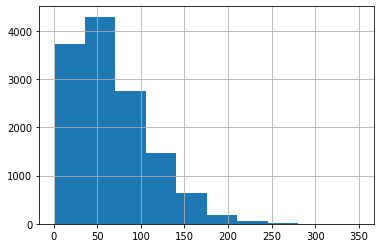

In [292]:
new_df.jumlah_char_text.hist()

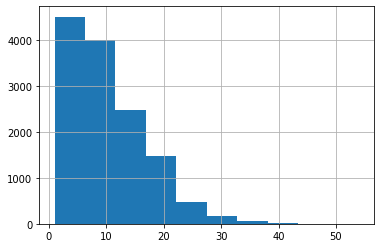

In [295]:
new_df.jumlah_word_text.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49a6b772d0>,
      dtype=object)

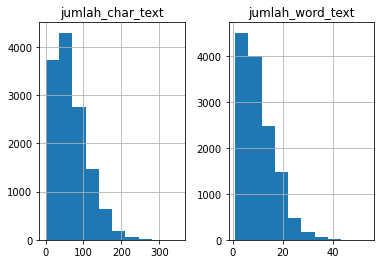

In [297]:
new_df[['jumlah_char_text','jumlah_word_text']].hist()

In [313]:
def label(score):
  if score == 0:
    return 'negatif'
  else :
    return 'positif'

new_df['label'] = new_df['hs'].apply(label)

new_df

,tweet,hs,abusive,jumlah_word_text,jumlah_char_text,temp_list,label
0,cowok usaha lacak perhati gue lantas remeh per...,1,1,14,84,"[cowok, usaha, lacak, perhati, gue, lantas, re...",positif
1,telat tau edan sarap gue gaul cigax jifla cal ...,0,1,10,51,"[telat, tau, edan, sarap, gue, gaul, cigax, ji...",negatif
2,41 kadang pikir percaya tuhan jatuh berkalikal...,0,0,19,121,"[41, kadang, pikir, percaya, tuhan, jatuh, ber...",negatif
3,akunnku tau mata sipit lihat,0,0,5,28,"[akunnku, tau, mata, sipit, lihat]",negatif
4,kaum cebong kafir lihat dongok dungu haha,1,1,7,41,"[kaum, cebong, kafir, lihat, dongok, dungu, haha]",positif
...,...,...,...,...,...,...,...
13164,bicara ndasmu congor sekata anjing,1,1,5,34,"[bicara, ndasmu, congor, sekata, anjing]",positif
13165,kasur enak kunyuk,0,1,3,17,"[kasur, enak, kunyuk]",negatif
13166,hati hati bisu gnnlagi bosan duh,0,0,6,32,"[hati, hati, bisu, gnnlagi, bosan, duh]",negatif
13167,bom real mudah deteksi bom kubur dahsyat ledak...,0,0,10,60,"[bom, real, mudah, deteksi, bom, kubur, dahsya...",negatif


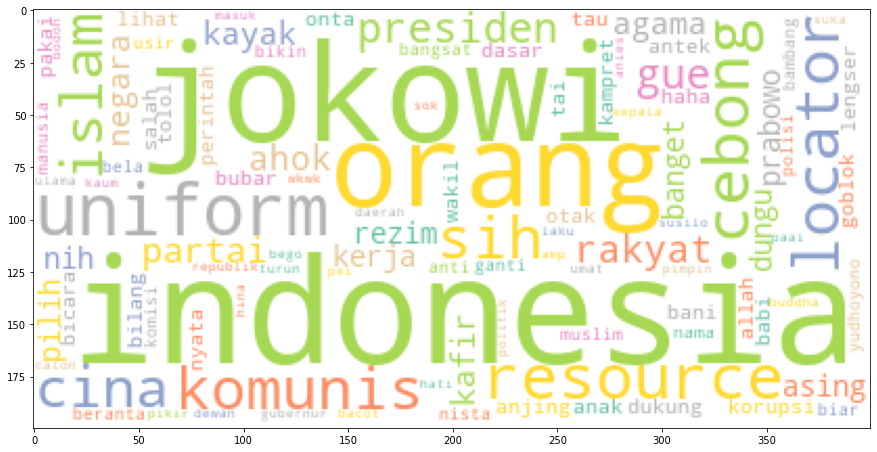

In [316]:
#Lihat persebaran kata di review text nya setelah di pre process
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['label'].str.contains('positif')]['tweet'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=100,colormap='Set2', collocations=False, background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

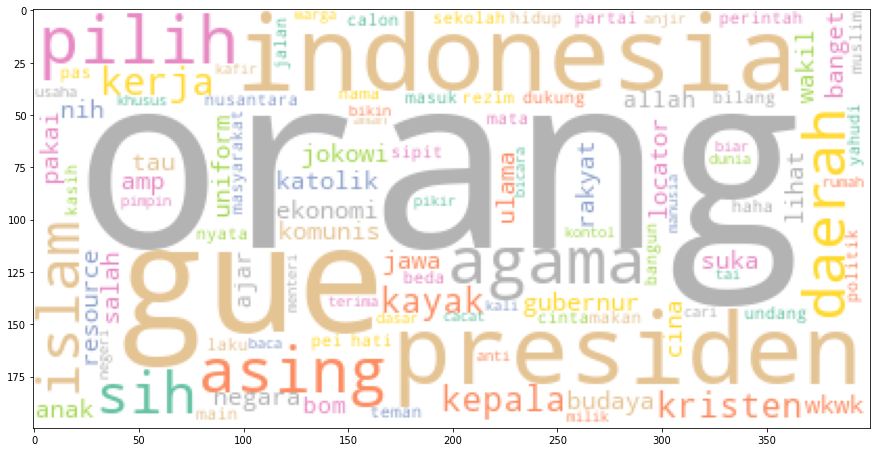

In [317]:
#Lihat persebaran kata di review text nya setelah di pre process
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(review) for review in new_df[new_df['label'].str.contains('negatif')]['tweet'].dropna().unique() if len(review)>3) 
wordcloud = WordCloud(max_words=100,colormap='Set2', collocations=False, background_color="white").generate(text) 
plt.figure(figsize=(15,10)) 
plt.imshow(wordcloud) 
plt.show()

In [318]:
new_df[['jumlah_char_text','jumlah_word_text']].corr()

,jumlah_char_text,jumlah_word_text
jumlah_char_text,1.000000,0.978067
jumlah_word_text,0.978067,1.000000


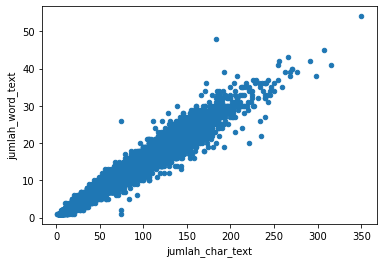

In [321]:
new_df.plot(x='jumlah_char_text', y='jumlah_word_text', kind='scatter')